In [21]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten #Note that there is Conv1D, Conv2D(images) and Conv3D(videos)
#Also note that Dense is the name of the fully connected NN.
#Flatten is also used to flatten the output of the convolutional layer

LOAD DATASET

In [22]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [23]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

#Now we need to normalize all the RGB values to keep them between 0 and 1 rather than 0 and 255 for easy computation
X_train = X_train/255.0
X_test = X_test/255.0

In [24]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", X_test.shape)


Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 100, 100, 3)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 100, 100, 3)


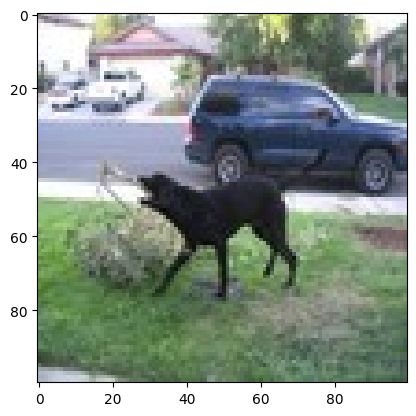

In [25]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[1,:])

MODEL

In [26]:
#Sequential means the model would be stacked up in layers.
#For eg. we know that for CNN, the input comes, then the convolutional layers and then the flattened layer etc. So here the layers are sequential ie. one after the other
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)), #Conv2D(num of filters, size of each filter, activation function, what is the shape of the input the model is receiving)
    MaxPooling2D((2,2)), #MaxPoolin2D(size of maxpooling window or filter, stride is optional since if not provided a stride of 1 would be automatically chosen)

    Conv2D(32, (3,3), activation = 'relu'),#Note that it's only the 1st convolutional layer that requires you to state the input shape
    MaxPooling2D((2,2)),

    Flatten(),#To flatten the multi-dimensional data into a 1D array which is the appropriate input shape for ANNs. 
    Dense(64, activation = 'relu'),#This is the first fully connected neural network. The dense function is used to create layers in an ANN and it goes like this... Dense(number of neurons in the layer, activation function of the neurons in the layer)
    Dense(1, activation = 'sigmoid') #This is the output layer containing only one neuron
])

#There is also another way of building ML models and it goes like this...
'''
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
'''

"\nmodel = Sequential()\n\nmodel.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))\nmodel.add(MaxPooling2D((2,2)))\n\nmodel.add(Conv2D(32, (3,3), activation = 'relu'))\nmodel.add(MaxPooling2D((2,2)))\n\nmodel.add(Flatten())\nmodel.add(Dense(64, activation = 'relu'))\nmodel.add(Dense(1, activation = 'sigmoid'))\n"

LOSS FUNCTION (BACKPROPAGATION)

In [27]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])#This is how to write a loss function and these are the parameters it takes

#If you want more control over your loss function you can choose not to use the standard parameters which comes with the 'adam' optimizer
#opt = keras.optimizers.SGD(learning_rate = 0.001)
#model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
#Note that it's in the loss or cost function that the backpropagation occurs

TRAINING THE MODEL

In [30]:
#This is how we train the model
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)
#The epochs represents the number of times or iterations to find the updated values using the gradient descent function to improve the model 
#Note that if you only run the model training over and over again, the training would always continue from the last training but if you run the loss or cost function and you come to train, the training begins afresh. 
#So without running the loss function and you train the model with 5 epochs twice, it is the same as setting the epochs to 10 and training the model once because the model would be training 10 times.

Epoch 1/5
32/32 [==============================] - 13s 410ms/step - loss: 0.1367 - accuracy: 0.9525
Epoch 2/5
32/32 [==============================] - 13s 394ms/step - loss: 0.0996 - accuracy: 0.9720
Epoch 3/5
32/32 [==============================] - 12s 390ms/step - loss: 0.0737 - accuracy: 0.9880
Epoch 4/5
32/32 [==============================] - 13s 398ms/step - loss: 0.0477 - accuracy: 0.9920
Epoch 5/5
32/32 [==============================] - 13s 397ms/step - loss: 0.0480 - accuracy: 0.9900


EVALUATING THE MODEL ON THE TEST DATA

In [31]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 55ms/step - loss: 1.1251 - accuracy: 0.6800


[1.1251235008239746, 0.6800000071525574]

WE CAN TRY SOME OPTIMIZING METHODS OR INCREASE THE TRAINING DATASET TO IMPROVE PERFORMANCE BECAUSE A 68% ACCURACY ON TEST DATA ISN'T ALL THAT IMPRESSIVE

MAKING PREDICTIONS

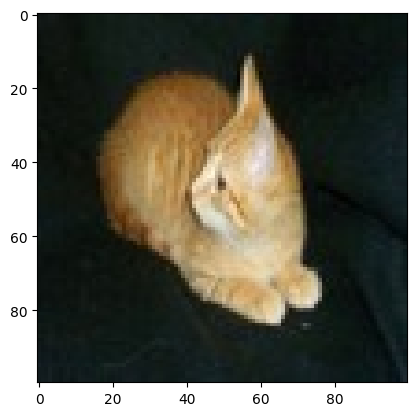

1/1 [==============================] - 0s 24ms/step
Our model says it is a  cat


In [37]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if (y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a ", pred)